# Plot the global gravity disturbance

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import seaborn

In [6]:
from datasets import load_icgem_gdf

In [7]:
def data_minmax(data):
    ranges = np.abs([data.min(), data.max()]).max()
    return dict(vmin=-ranges, vmax=ranges)

In [8]:
data = load_icgem_gdf('../data/ggm05g.gdf')
shape = data['shape']

In [9]:
bm = Basemap(projection='ortho', lon_0=-60, lat_0=10,
             resolution='l')

In [10]:
x, y = bm(data['longitude'].reshape(shape), data['latitude'].reshape(shape))

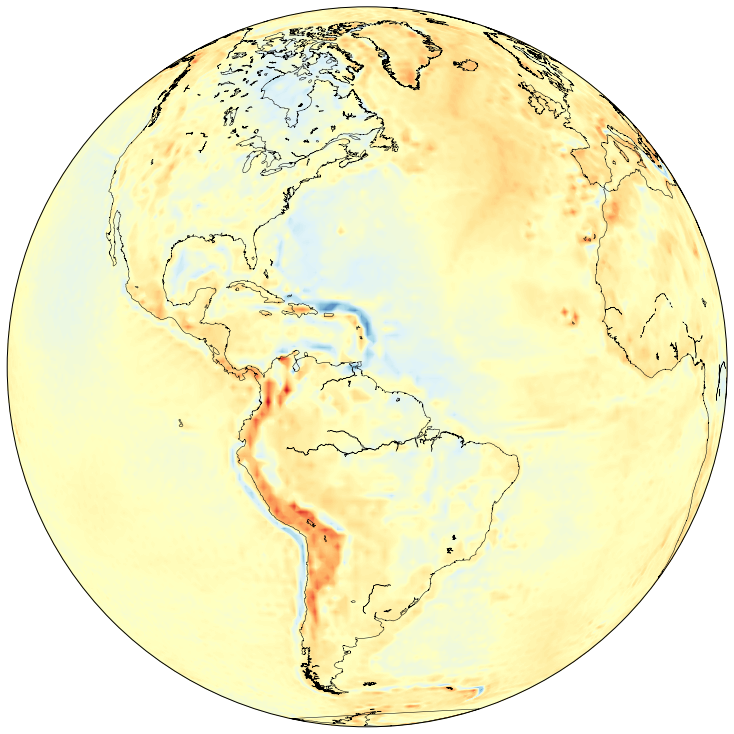

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
bm.contourf(x, y, data['gravity_disturbance'].reshape(shape),
            150, cmap='RdYlBu_r', **data_minmax(data['gravity_disturbance']))
bm.drawcoastlines(linewidth=0.5)
plt.tight_layout(pad=0)
plt.savefig('../figures/ggm05g-disturbance.png', dpi=200, transparent=True)